#### 1. Import the necessary libraries

In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
from scipy import stats 

#### 2. Read the data as a data frame

In [3]:
Ins_df = pd.read_csv("insurance.csv",header=0)

#### 3. Perform basic EDA which should include the following and print out your insights at every step.

###### a. Shape of the data

In [4]:
Ins_df.shape

(1338, 7)

The insurance data set has 1338 rows of data and each row has 7 attributes.

###### b. Data type of each attribute

In [5]:
Ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print('Attribute names:',Ins_df.columns)

Attribute names: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


The dateset has 7 coulumn or attributes among which 3 coulumns have categorical data.

In [7]:
Ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


There are four coulumns that have numeric data either of type float or integer.

###### c. Checking the presence of missing values

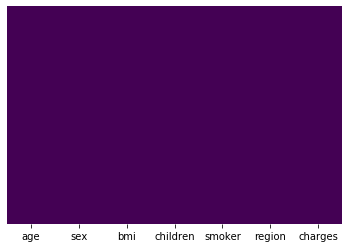

In [8]:
sns.heatmap(Ins_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
Ins_df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

As per the heatmap and value counts, there are no missing values in the data set.

###### d. 5 point summary of numerical attributes

In [10]:
Ins_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The average age of people applying  for insurance are 39 years of age. The avergae number kind per insurer is 1 and the avergae charge per insurance policy is 13,270 dollars.
Minimum age criteria for insurance as per this dataset is 18 and the lowest insurance policy charge is 1,122 dollars. The insurers are spread across groups who have maximum of 5 children and no children at all (could be single or couples with no kids).
Majority of the insurer age is between that range 27 to 51 years. The maximum of age of an insurer is 64 years and only 25 % of the sample population lies between the age 51 to 64 years.
The average BMI of the group is 30 and 50 % of the population have BMI 30 or below. The insurance cost is directly propotional to the number of members in the family and can go up to 63770 dollars.
50% of the insurers have either 1 or no child.


###### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
###### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’columns
###### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

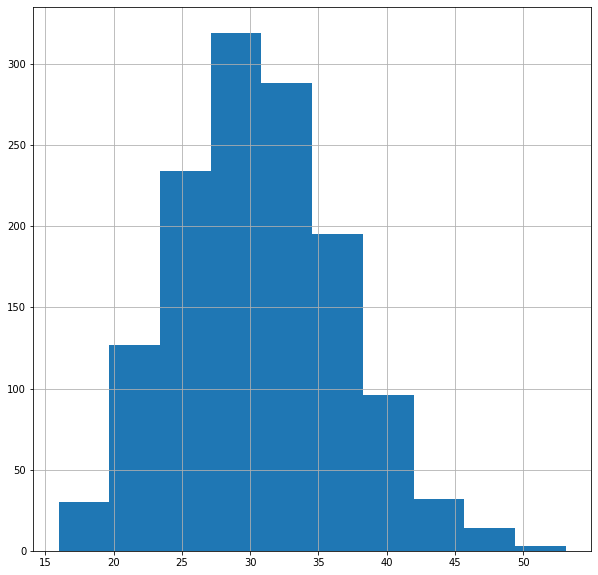

In [11]:
Ins_df['bmi'].hist(figsize=[10,10])

The BMI attribute is a uniform distribution that is slightly right skewed. The majority of the insurers have BMI values in the range of 25 to 35.There are very few who are having BMI above 50.

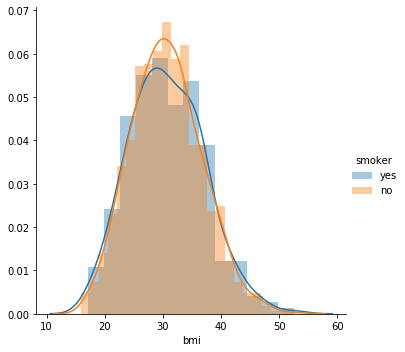

In [12]:
sns.FacetGrid(Ins_df,hue='smoker',size=5).map(sns.distplot,'bmi').add_legend()

It can be seen that there is not much difference between the BMIs of smokers and non smokers and the curves are very similar and data is almost uniformly spread for both groups. 

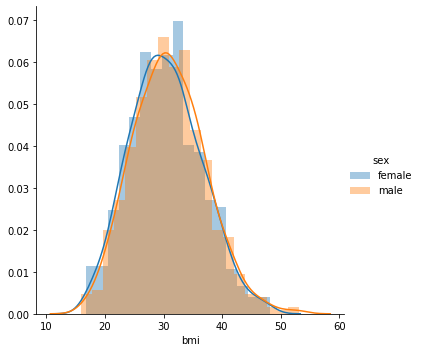

In [13]:
sns.FacetGrid(Ins_df,hue='sex',size=5).map(sns.distplot,'bmi').add_legend()

It can be seen from the graph that there is no significance difference in BMI in males and females.

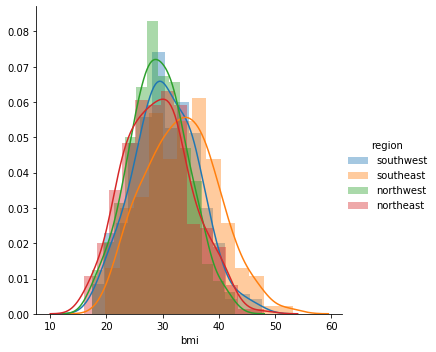

In [14]:
sns.FacetGrid(Ins_df,hue='region',size=5).map(sns.distplot,'bmi').add_legend()

The majority of the BMIs belong to people from regions southwest,northwest and northeast. Also, it can be seen that the highest of the BMIs are from Southeast region.

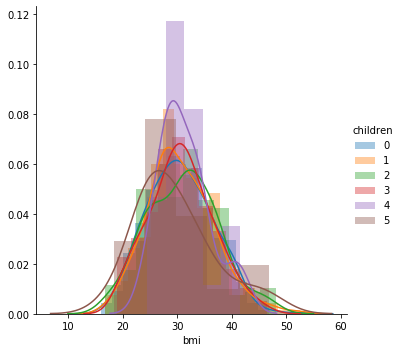

In [15]:
sns.FacetGrid(Ins_df,hue='children',size=5).map(sns.distplot,'bmi').add_legend()

The lowest and highest BMI are from group of people who have 5 children. The majority of people have either 0,1,2,3,4 children with the highest number of people with 4 children.

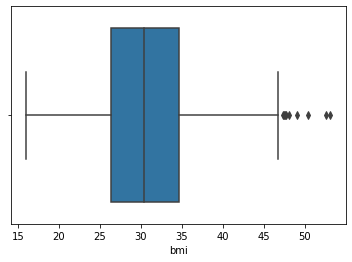

In [16]:
sns.boxplot(Ins_df['bmi'])

It can be seen that there are outliers in the BMI data and it can be said the most of these belong to the Southeat regions..The distribution is slightly right skewed with 50 % of the population having 30 BMI. Also, the bulk of BMIs lie in the range of 25 to 35.

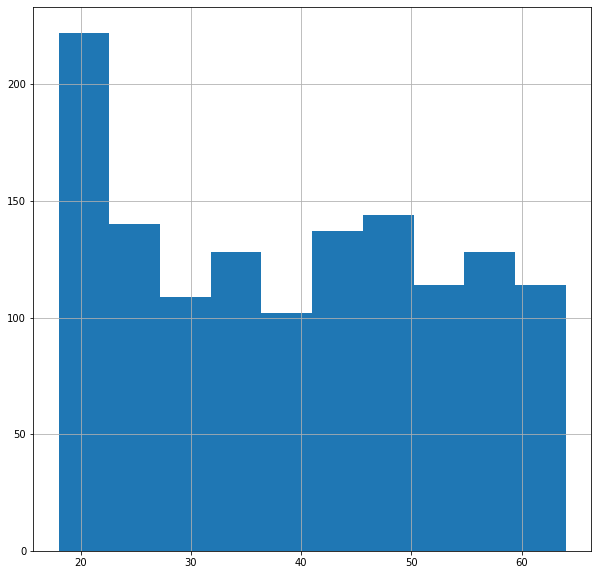

In [17]:
Ins_df['age'].hist(figsize=[10,10])

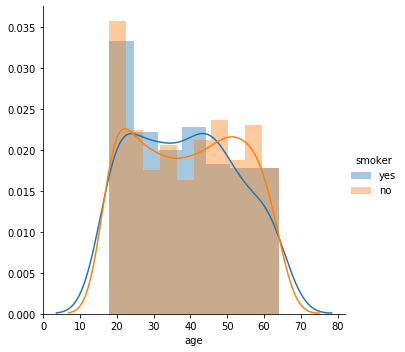

In [18]:
sns.FacetGrid(Ins_df,hue='smoker',size=5).map(sns.distplot,'age').add_legend()

The distribution of smokers and non smokers accross all ages are almost equally distributed. Majority of smokers and non-smokers are in the range of 20 to 30 years. After 45 years of age, there is a dip in the number of smokers.

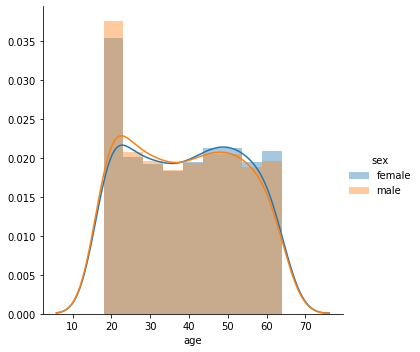

In [19]:
sns.FacetGrid(Ins_df,hue='sex',size=5).map(sns.distplot,'age').add_legend()

There are almost equal number of males and females in the sample population. The highest number of insures are young and of 20 to 25 years of age.

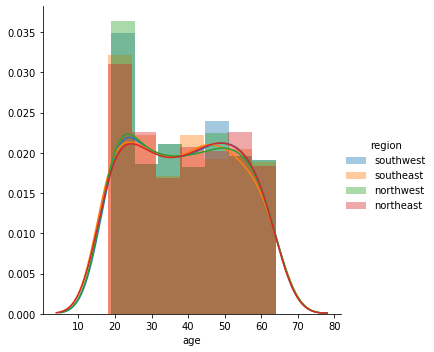

In [20]:
sns.FacetGrid(Ins_df,hue='region',size=5).map(sns.distplot,'age').add_legend()

There is equal representation of each age group from all the 4 regions.

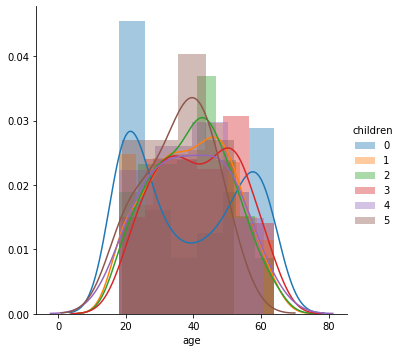

In [21]:
sns.FacetGrid(Ins_df,hue='children',size=5).map(sns.distplot,'age').add_legend()

The insurers with no children are either people of age less than 25 years or greater than 60 years of age. This group forms the majority of the population.The next highest group of people are of age range 40 to 50 years who have either 5 or 2 kids.

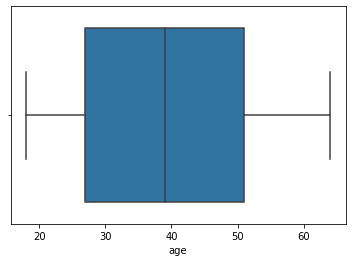

In [22]:
sns.boxplot(Ins_df['age'])

There are no outliers and the distribution is almost a normal distribution. The median age 39 and bulk of the population lie in age range 27 to 51 years.

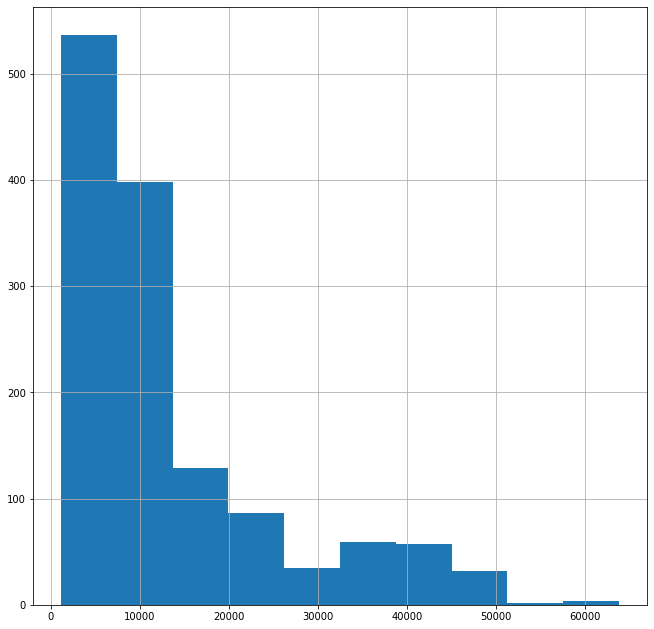

In [23]:
Ins_df['charges'].hist(figsize=[11,11])

The charges distribution is highly right skewed. The majority of the population pays  > 10,000 dollars premium and the average premium charges ar about 13,000 dollars.

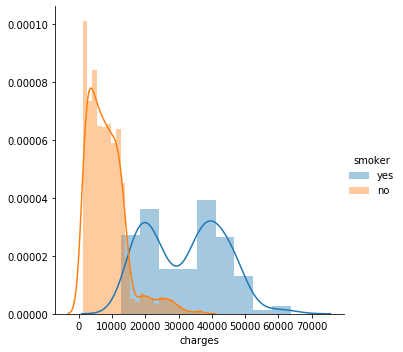

In [24]:
sns.FacetGrid(Ins_df,hue='smoker',size=5).map(sns.distplot,'charges').add_legend()

The charges for smokers highly differ from non-smokers and they are also greater in value than non-smokers.There are two peaks in smoker premium charges. One is at 20,000 dollars and the other at 40,000 dollars.The bulk of insurers are non-smokers who pay less than 10,000 dollars of premium.

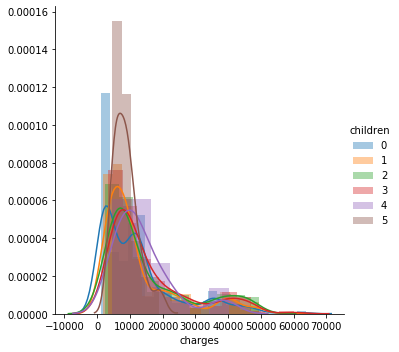

In [25]:
sns.FacetGrid(Ins_df,hue='children',size=5).map(sns.distplot,'charges').add_legend()

It can be seen that there is no direct correlation between the number of kids and the premium charges. It is observed that the lowest premium is paid by people who have no or 5 children. These people are also the majority. Highest premiums are paid by all groups except the insures who have 5 kids. The lowest premium charges are in this group. 

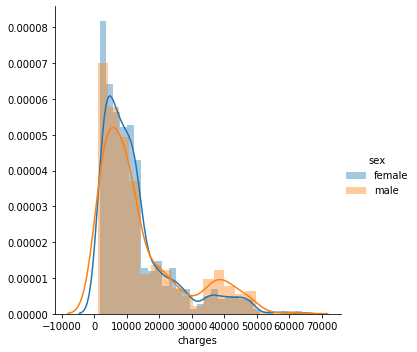

In [26]:
sns.FacetGrid(Ins_df,hue='sex',size=5).map(sns.distplot,'charges').add_legend()

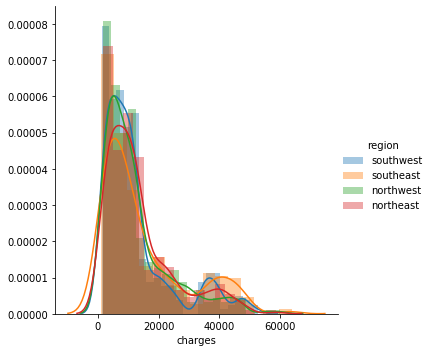

In [27]:
sns.FacetGrid(Ins_df,hue='region',size=5).map(sns.distplot,'charges').add_legend()

The is good representation of people from all 4 regions when it comes to range of charges. But the largest number of people paying very high premium are slighly more from southeast region. 

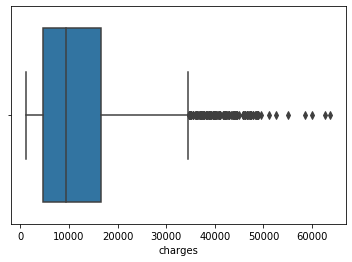

In [28]:
sns.boxplot(Ins_df['charges'])

The charges attribute is a highly right skewed distribution with majority of people laying between 9,000 to 15,000 dollars of premium. The median charge is 9,000 dollars. Most of the outliers are people option for more add on or an expensive insurance policy.

###### h. Distribution of categorical columns (include children)

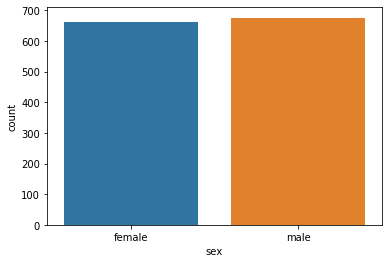

In [29]:
sns.countplot(Ins_df['sex'])

The dataset has almost equal # of males and females. The number of males are slightly let than females.

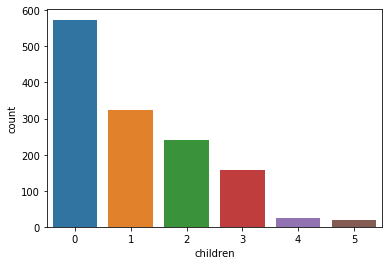

In [30]:
sns.countplot(Ins_df['children'])

Majority of the sample population have no children. It could be either singles or couples with no children. The second highest count for children is an insurer with 1 child. There are very few insurers who have 3 or more children. The maximum # of children any insurer has is 5.

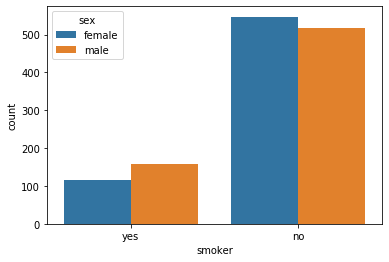

In [31]:
sns.countplot(Ins_df['smoker'],hue=Ins_df['sex'])

The dataset is dominated with more number of non smokers than smokers. There are mostly more males who smoke than females.

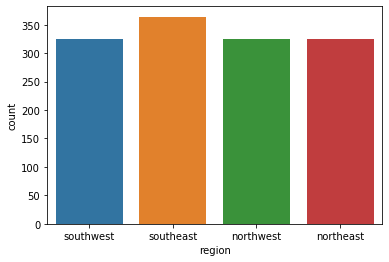

In [32]:
sns.countplot(Ins_df['region'])

Insurers accross the dataset are almost equally distributed across sample population. There are slightly more people who belong to southeast region.

###### i. Pair plot that includes all the columns of the data frame

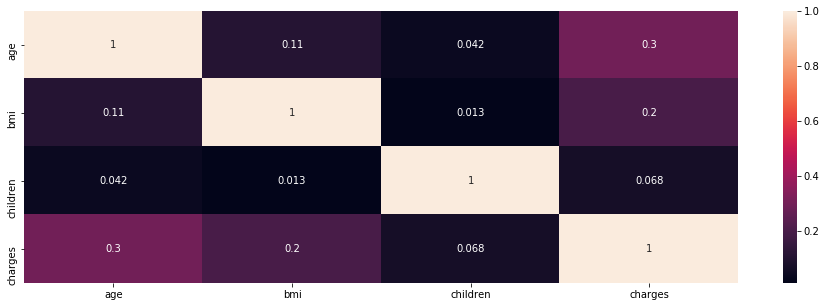

In [33]:
plt.figure(figsize=(16,5)) 
# Calculate correlation between each pair of variable
corr_matrix=Ins_df.corr()
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr_matrix,annot=True,cmap=cmap)
sns.heatmap(corr_matrix,annot=True)

The correlation matrix shows correlation of charges with age and BMI but the correlation is not very strong. There is very poor correlation among the attributes in general.

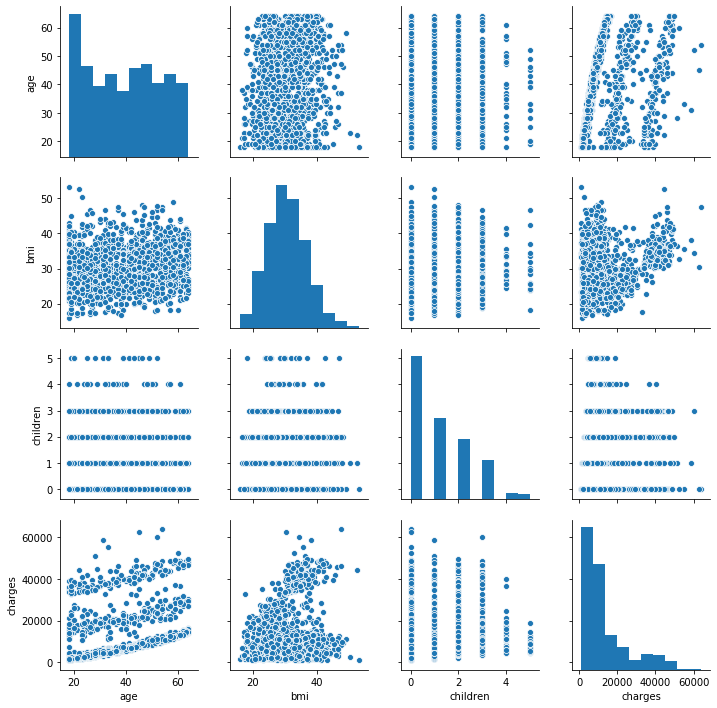

In [34]:
sns.pairplot(Ins_df)

The age distribution is a uniform distribution and BMI is a normal distribution. Children column has almost the same correlation with other attributes charges, age and BMI. Charges distribution is highly right skewed.Charges attribute seems to have good correlation across age BMI. There are 3 clusters each of high, medium and low premium charges policies which are scattered equally across all age groups.

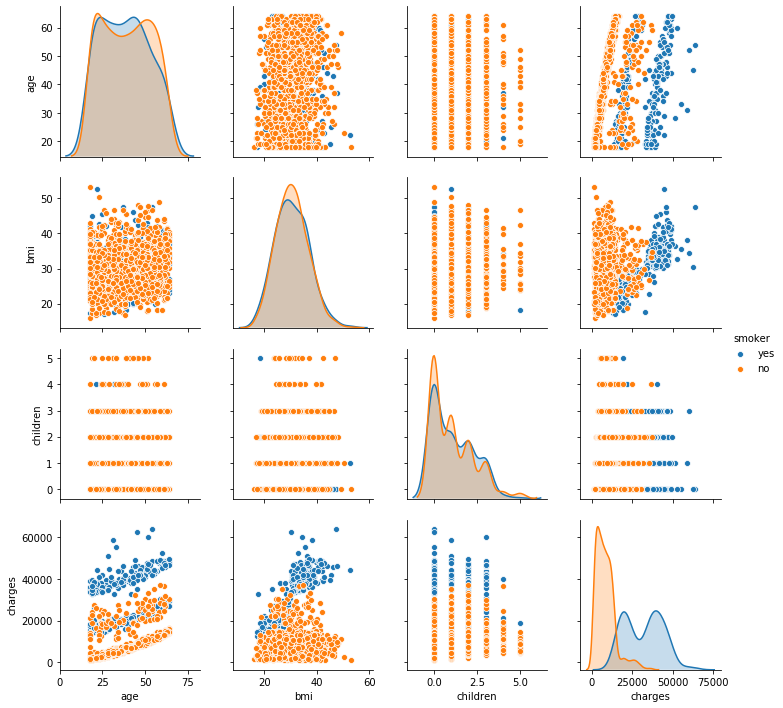

In [35]:
sns.pairplot(Ins_df,hue='smoker')

There is no significant difference in BMI of smokers and non-smokers.It can also be observed that the high premium paying insurers are mostly smokers whose BMI lie between 20 to 45 and the lowest and medium premium segment is dominated by non-smokers across all BMIs. No of children are equally distributed accross smokers and non smokers. 

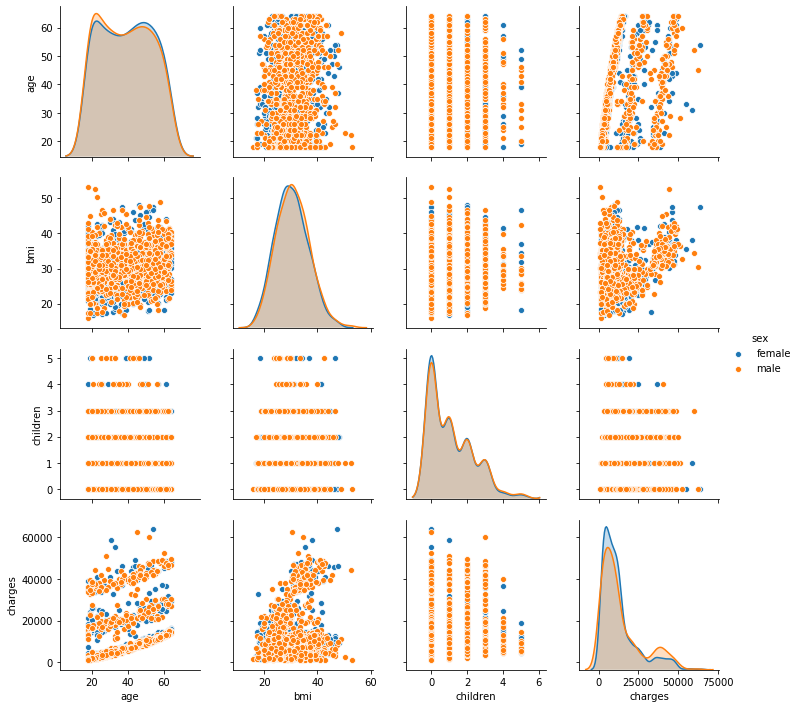

In [36]:
sns.pairplot(Ins_df,hue='sex')

The gender distribution is almost equally across the population for all attributes. It that the high premium insurers are mostly males than females and lowest premium is payed by majority of female population.

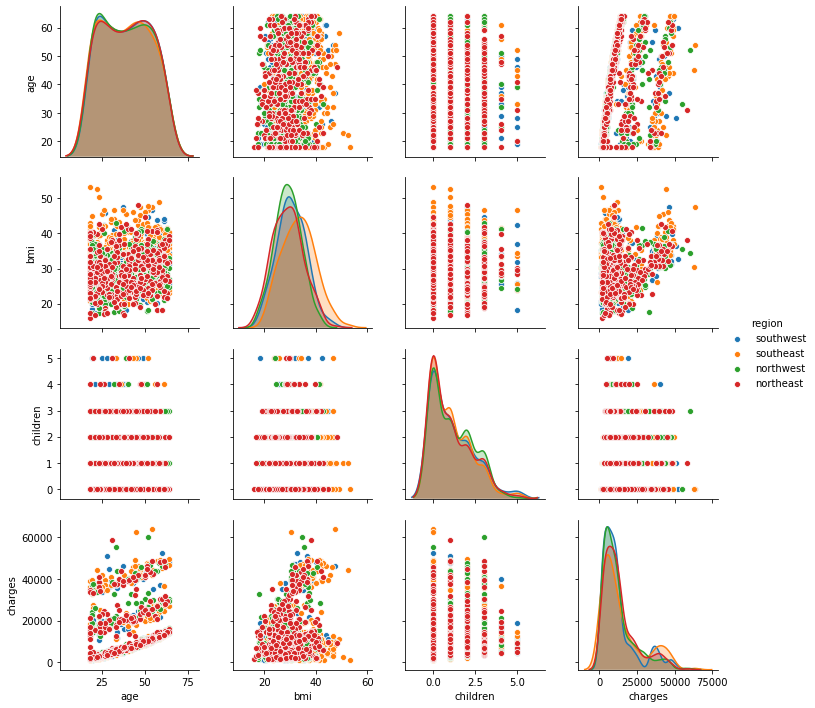

In [37]:
sns.pairplot(Ins_df,hue='region')

It can be seen that there is good representation from all regions except that people of southeast have slightly high BMI and probably that why they are mostly more in numbers of medium premium paying segment that ranges from 25000 dollar to 55000 dollars.

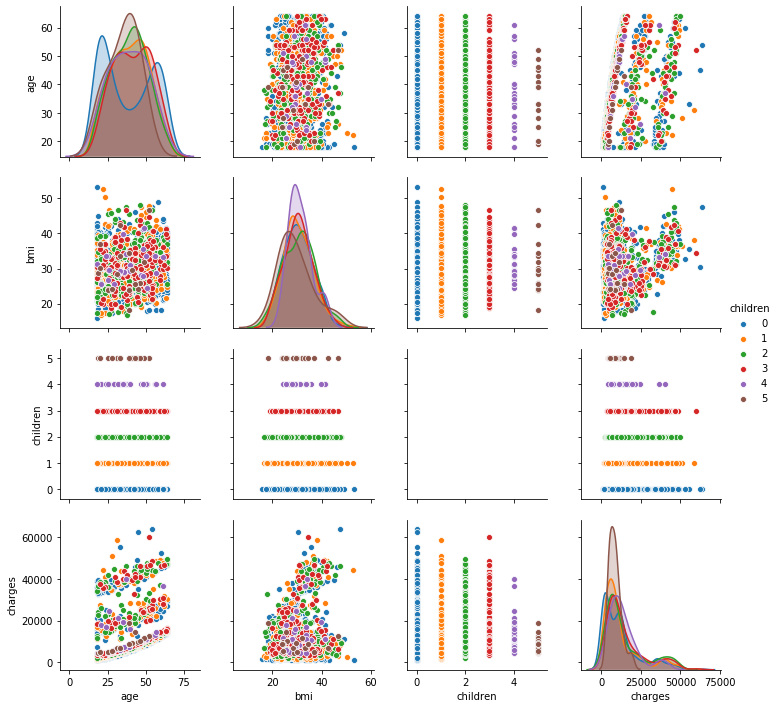

In [38]:
sns.pairplot(Ins_df,hue='children')

Number of children are uniformly distributed accross all ages but people with no children are either very young or older than 40 years. Premium charges are very low for families that have 5 children.The median BMI is formed by those who have 4 children.

#### 4. Answer the following questions with statistical evidence

#### a. Do charges of people who smoke differ significantly from the people who don't?

We need to test whether smokers and non smokers data is statistically different. Therefore, we will use two-sample t-test.

#### Two-sample t-test

Null Hypothesis : Charges of people who smoke do not differ significantly from people who dont.

Alternate Hypothesis : Charges of people who smoke differ significantly from the people who dont.

In [39]:
#extracting smokers and non smokers from the insurance dataset
non_smoker=Ins_df.loc[Ins_df['smoker'] == 'no']
smoker=Ins_df.loc[Ins_df['smoker'] == 'yes']

In [40]:
S1=non_smoker['charges']
S2=smoker['charges']

In [41]:
Alpha=0.05
t_statistic, p_value  =  stats.ttest_ind(S2,S1)
print(t_statistic,p_value)
print('P Value is %1.3f' % p_value)
print('Value of P <',Alpha,'So the statistical decision is to reject the null hypothesis at 5% level of significance.')
print('So, there is a significant difference between the charges of smokers and non smokers')

46.664921172723716 8.271435842177219e-283
P Value is 0.000
Value of P < 0.05 So the statistical decision is to reject the null hypothesis at 5% level of significance.
So, there is a significant difference between the charges of smokers and non smokers


#### b. Does bmi of males differ significantly from that of females?

We need to test whether male BMI is statistically different from female BMI. Therefore, we will use two-sample t-test.

#### Two Sample t-test

Null Hypothesis : BMI of males do not differ significantly from BMI of females.

Alternate Hypothesis : BMI of males differ significantly from BMI of females.

In [42]:
#extracing data female BMI and male BMI from dataset.
female=Ins_df.loc[Ins_df['sex'] == 'female']
male=Ins_df.loc[Ins_df['sex'] == 'male']

In [43]:
F1=female.bmi
M1=male.bmi

In [44]:
Alpha=0.05
t_statistic, p_value  =  stats.ttest_ind(M1,F1)
print(t_statistic,p_value)
print('P Value is %1.3f' % p_value)
print('Value of P >',Alpha,'So the statistical decision is not to reject the null hypothesis at 5% level of significance.')
print('So, there is no significant difference between the BMIs of males and females')

1.696752635752224 0.08997637178984932
P Value is 0.090
Value of P > 0.05 So the statistical decision is not to reject the null hypothesis at 5% level of significance.
So, there is no significant difference between the BMIs of males and females


#### c.Is the proportion of smokers significantly different in different genders?

Since we have to evaluate the relationship of smokers across genders, we will use Chi-square tests.

#### Chi-square test

Null Hypothesis : Proportion of smokers is not significantly different between genders.

Alternate Hypothesis : Proportion of smokers is significantly different between genders.

In [45]:
#extracting female smokers counts
A1=female.smoker.value_counts()
A=A1.values

In [46]:
#extracting male smoker counts
A2=male.smoker.value_counts()
B=A2.values
#Creating the contigency table of female and male smokers counts.
C=[A,B]

In [47]:
alpha=0.05
Chi2_stat, p_value, degreeoffreedom, contingency=stats.chi2_contingency(C)
print('Chi2 stat:',Chi2_stat)
print('P value:',p_value)
print('Since P value <',alpha,'statistical decision is to reject null hypothesis,therefor,proportion of smokers is significantly different between genders.')
print('Degree of Freedom:',degreeoffreedom)
print('Contingency Table:\n', contingency)
print('So, Proportion of smokers is significantly different between genders.')

Chi2 stat: 7.39291081459996
P value: 0.006548143503580696
Since P value < 0.05 statistical decision is to reject null hypothesis,therefor,proportion of smokers is significantly different between genders.
Degree of Freedom: 1
Contingency Table:
 [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
So, Proportion of smokers is significantly different between genders.


#### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

Since this is a multivariate analysis, we will use ANOVA test to confirm our hypothesis.

#### ANOVA test

Null Hypothesis : BMI distribution does not differ significantly for wowen with no children,one child and 2 children

Alternate Hypothesis : BMI distribution does differ significantly for wowen with no children,one child and 2 children

In [48]:
#extracting females who have 0,1 and 2 children fron insurance dataset.
No_child=female.loc[female['children'] == 0]
One_child=female.loc[female['children'] == 1]
Two_child=female.loc[female['children'] == 2]

In [49]:
C0=No_child.bmi
C1=One_child.bmi
C2=Two_child.bmi

In [50]:
#Levene's Test
statistic, p_value=stats.levene(C0,C1,C2)
print(statistic,p_value)
print('P value is %1.3f' % p_value)
print('P value >', 0.05,'statistical decision is not to reject null hypothesis')
print('Since all input samples are from populations with equal variances, we can go ahead with ANOVA test')

0.9433311607108589 0.3899432394522804
P value is 0.390
P value > 0.05 statistical decision is not to reject null hypothesis
Since all input samples are from populations with equal variances, we can go ahead with ANOVA test


In [51]:
#Anova Test
f_statistic, p_value=stats.f_oneway(C0,C1,C2)
print(f_statistic,p_value)
print('P value is %1.3f' % p_value)
print('Value of P >',Alpha,'So the statistical decision is NOT to reject the null hypothesis at 5% level of significance.')
print('Therefore, BMI distribution does not differ significantly for wowen with no children,one child and 2 children')

0.3344720147757968 0.7158579926754841
P value is 0.716
Value of P > 0.05 So the statistical decision is NOT to reject the null hypothesis at 5% level of significance.
Therefore, BMI distribution does not differ significantly for wowen with no children,one child and 2 children
